In [1]:
import sys
sys.path.append('..')

from Tools.plot import *
from Tools.gen import *
# from load_data import *  
from Tools.func_tools import *
from Algorithm.AGM import *
from Algorithm.GM import *
# from BFGS import *
from Algorithm.Newton_CG import *
import warnings
warnings.filterwarnings('ignore')

c:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:172: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-112)),
c:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:51: RuntimeWarning: divide by zero encountered in log10
  self.precision = int(-log10(self.eps))
c:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:52: RuntimeWarning: divide by zero encountered in power
  self.resolution = float_to_float(float_conv(10) ** (-self.precision))
c:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:184: RuntimeWarning: divide by zero encountered in exp2
  epsneg_f80 = exp2(ld(-64))
c:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:185: RuntimeWarning: divide by zero encountered in exp2
  tiny_f80 = exp2(ld(-16382))
c:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:199: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-63)),
c:\Users\15161\Anaconda3\lib\site-packages\nump

In [3]:
centroids, points, N = gen_data() 

In [4]:
lbd = 0.05
delta = 0.01
cg_max = 10
tol = 1
cg_tol_k = 1 # 可以使用同样的tol
alpha0 = 1
gamma = 0.01
sigma = 0.5
n = points.shape[0]
d = points.shape[1]
B = gen_B(n,sparse=False)
func = lambda X, B: loss_func(X,points,lbd,delta,B)
h_obj = OBJ(d, n, delta)
grad = lambda X: grad_hub_matrix(X,delta,points,lbd,B,B.T)
HessianP = lambda X: h_obj.hessiant(X.T, h_obj.grad(X.T, points.T, lbd).reshape((d,n)), lbd)
bck = lambda X, gk, dk: backtrack(X, func, gk, dk,B,alpha0,gamma,sigma)

In [5]:
ans3, CG_loss = NewtonCG(grad, HessianP, bck, np.zeros_like(points), cg_max, cg_tol_k, tol)

25.37348552958234 1
9.66822453835963 1
3.434590506847723 0.25
not the first step 10.623097716268093 614.7125373126106 45.884593033848894 3.813938794458891
2.196683691248966 0.125
0.9672625232971412 0.125


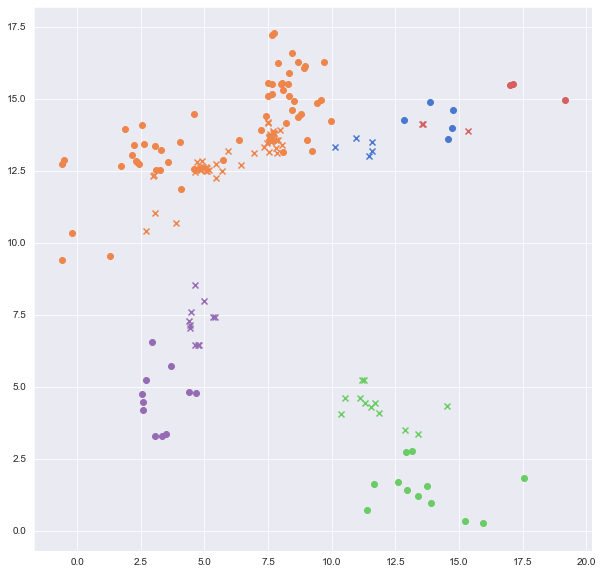

In [6]:
groups = get_group(ans3, tol=2)
plt.figure(figsize=(10,10))
plot_res_data(points,ans3,groups)

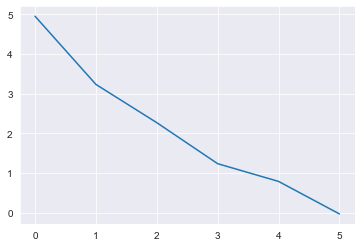

In [7]:
plt.plot(np.log(CG_loss))